# COMP 4447 Final Project
- Github Link: github url
- Project Team: Max and Jimmy
- Winter 2023

# Data Science Pipeline
### Planning >> Data Collection >> Data Cleanup >> Visualization >> Deliver Insight

Planning 
- Creating a GitHub site for easy file management and collaboration
- Brainstorm on topics and identify data sources

Data Collection
- Scraping data from Zillow website
- Data transformation

Data Cleanup
- Data review
- Identifying and removing outliers

Visualization
- Exploring the data

Deliver Insight
- Documenting all processes and code in Jupyter notebook.

## Dataset and Motivation

The ongoing housing crisis in multiple prominent cities throughout North America has been a major motivation behind our selection of real estate data for the COMP 4447 final project. For this particular project, our dataset will focus on two coastal cities, Vancouver in BC Canada and Los Angeles in CA USA, where housing costs are generally viewed as "inflated". Our goal is to better understand the housing market and hope to derive insights on factors that drive the difference in housing sale prices. 

The dataset will be comprised entirely of web-scraped data from Zillow. Due to the anti-scraping mechanisms where after a certain number of request calls a cloudfare "human verification" will appear, we acknowledge that our dataset may be incomplete. However as later described in the web-scraping section, even with the incomplete dataset it can still be viewed as generally representative. 

Due to the general lack of available sold listing price data, we will use the listing sale price data as the focus for our analysis. Future work can definitely extend into the actual sold prices of these houses and compare that with the sale listing price.

One other observation we're investigating is whether there's any potential difference in factors that drive housing prices between the Canadian and USA markets, based on the comparison between trends in Vancouver and Los Angeles. 

Metadata:
- Date Scraped: Feb 10, 2023
- Total number of Listings scraped in Vancouver: 4322
- Total number of Listings scraped in Los Angeles: 11153
- Additional metadata and a complete summary of our dataset can be found in the [data cleaning](#Data-Dictionary-of-Variables) section below
- The reference to "house" hereby refers to all property types including but not limited to single family house, duplex house, townhouse, apartment and condominium units, etc

## Literature Review and References
- Data Analysis: predicting the housing market using Python, W.Weldon, Mar 2019, [reference link](https://towardsdatascience.com/data-analysis-predicting-the-housing-market-using-python-eae4f9fbd4e5)

- Real Estate House Price Prediction Using Data Science, Varun Sonavni, Sept 2021, [reference link](https://python.plainenglish.io/data-science-project-real-estate-house-price-prediction-website-df71ac98a132)

- House Prices - Exploratory Data Analysis, Amazon AWS, [reference link](https://rstudio-pubs-static.s3.amazonaws.com/378009_aa5c0f996b884a68ac3d09d98865e35e.html)

- Web Scrape Zillow Real Estate Data, Manthan Koolwal, May 2022, [reference link](https://www.scrapingdog.com/blog/scrape-zillow/)

- Housing Market Activity Off to a Slow Start, Brendon Ogmundson, Feb 2023, BCREA, [reference link](https://www.bcrea.bc.ca/economics/housing-market-activity-off-to-a-slow-start-in-2023/)

- Canadian home sales begin 2023 at 14-year low, Pierre Leduc, Feb 2023, CREA, [reference link](https://www.crea.ca/media-hub/news/canadian-home-sales-begin-2023-at-14-year-low/)

- The Housing and Economic Experiences of Immigrants in US and Canadian Cities, Carlos Texeira, University of Toronto Press 2015, [reference link](https://www.degruyter.com/document/doi/10.3138/9781442622890-006/html)

- VANCOUVER REAL ESTATE MARKET UPDATE JANUARY 2023, Alan Kelly, Feb 2023, Bode, [reference link](https://home.bode.ca/blog/vancouver-real-estate-market-update-january-2023/)

- Los Angeles Housing Market: Prices, Trends, Forecast 2023, Marco Santarelli, Feb 2023, Norada, [reference link](https://www.noradarealestate.com/blog/los-angeles-real-estate-market/)

- California Housing Market Report, Gord Collins, Jan 2023, ManageCasa, [reference link](https://managecasa.com/articles/california-housing-market-report/)



The engineered feature "distance to waterfront" that we have developed for our analysis is a novel approach in analyzing housing data. While mainstream analysis of housing data typically focuses on variables such as time-based trends, square footage, number of bedrooms, and hollistic location, our approach takes the another step in feature engineering by deriving a geolocation based feature that represents an estimated distance of a house to waterfront. 

By drawing a coastline polygon and calculating the distance of each house's latitude/longitude to the coastline, we have introduced a new variable may impact the desirability of a property's location. Overall, our approach investigates the importance of considering location-based factors in analyzing housing data and can extend to a multitude of other location-based factors such as distance to particular points of interests for stakeholders in the real estate industry.

## Task Definition and Research Question

### Research Question
Based on available data from house sale listings, what are the major factors that influence listing sale price, and is there a significant difference in the effect between the Canadian and US housing markets based on two representative samples from Vancouver BC and Los Angeles CA?

### Input Data
- Web scraped data from Zillow for available listings in Vancouver BC and Los Angeles CA, limited to the website's anti-scraping threshold. 
- Engineered features from scraped data for each listing, such as distance to waterfront

### Output
- Summary statistics of data for properties listed for sale in Vancouver BC and Los Angeles CA
- Visualizations that reveal correlations between house prices and features extracted from the sale listing

# Data Collection

### Zillow Scraping Full Example

### Import scraper and utility modules
- Create a "scraper" object that will perform the scraping of zillow website data
- Create bounding boxes of latitudes and longitudes for two cities Vancouver, BC in Canada and Los Angeles, CA in USA
- The data from these two cities will be combined for the final analysis

In [7]:
from src.webscraper.zillow_scraper_v3 import ZillowScraper
from src.webscraper.utils.scraper_utils import divide_rectangle, json_savefile, visualize_boxes, point_to_line_dist



In [ ]:
scraper = ZillowScraper()

LA_box = {'west_bound': -118.7,
          'east_bound': -117.6,
          'south_bound': 33.5,
          'north_bound': 34.5}

Vancouver_box = {'west_bound': -123.35,
                 'east_bound': -122.7,
                 'south_bound': 49.0,
                 'north_bound': 49.4}


### Subdivide the query into smaller partitions
- Since Zillow's website limits the number of listings that can be returned from a scrape to a max of 500, there is a need to subdivide the scrape to capture as much data as possible
- The bounding box for each city is subdivided into 0.01 Square Kilometer sub-boxes, and the scraping will be performed on those iteratively
- This may still miss some listings in very high density areas (some sub-boxes still have more than 500 listings) but at least it should provide a decent representation of house listing data in each city for the analysis
- There are also boxes that are not likely to contain any listings (ie in the ocean), which doesn't pose problems since they'll just return zero listings and be passed over

In [2]:
Vancouver_sub_boxes = divide_rectangle(Vancouver_box, limit=0.01)
LA_sub_boxes = divide_rectangle(LA_box, limit=0.01)

In [3]:
# Visualize the data comprising one of the sub-boxes in Vancouver
sub_box = Vancouver_sub_boxes[0]
sub_box

{'west_bound': -123.35,
 'east_bound': -123.22,
 'south_bound': 49.0,
 'north_bound': 49.1}

In [4]:
# Visualizing all of these sub-boxes on a map for Vancouver, BC
vancouver_map = visualize_boxes(Vancouver_sub_boxes)
vancouver_map

In [5]:
# Visualizing all of these sub-boxes on a map for Los Angeles, CA
LA_map = visualize_boxes(LA_sub_boxes)
LA_map

### Once the sub-boxes are established, the scraping is performed via looping through all sub-boxes
- Parallizing this scrape will cause a ban from Zillow's anti-scraping mechanism, therefore we are limited to using single thread loop to go through all sub-boxes in each city
- The scrape takes ~2.5 hours to complete, and returned 4322 listings in Vancouver, and 11153 listings in Los Angeles

In [ ]:
vancouver_listings = []
for sub_box in Vancouver_sub_boxes:
    sub_box_data=scraper.scrape_listings(
            west_bound=sub_box["west_bound"],
            east_bound=sub_box["east_bound"],
            south_bound=sub_box["south_bound"],
            north_bound=sub_box["north_bound"],
            search_term='Vancouver, BC',
        )
    
    vancouver_listings += sub_box_data
    
print(f"Scraped a total of {len(vancouver_listings)} in Vancouver, BC, Canada")

In [ ]:
LA_listings = []
for sub_box in LA_sub_boxes:
    sub_box_data=scraper.scrape_listings(
            west_bound=sub_box["west_bound"],
            east_bound=sub_box["east_bound"],
            south_bound=sub_box["south_bound"],
            north_bound=sub_box["north_bound"],
            search_term='Los Angeles, CA',
        )
    
    LA_listings += sub_box_data
    
print(f"Scraped a total of {len(LA_listings)} in Los Angeles, CA, United States")

In [8]:
# the raw outputs of the scrape is stored for future usage
json_savefile(vancouver_listings, "data/vancouver_listings_scraped.json")
json_savefile(LA_listings, "data/LA_listings_scraped.json")


json output file saved to vancouver_listings_scraped.json
json output file saved to LA_listings_scraped.json


### Obtaining the distance to waterfront
- Both cities are coastal cities, therefore the distance to waterfront is a common feature we can obtain for both sets of listings scrapd
- This is done by first creating a polyline manually that roughly traces the coast line to the pacific ocean
- Then for each listing we take its latitude and longitude obtained from the Zillow scrape, and estimate this property's distance to the nearest point along the polyine of the city's coastline
- From the utils module the point_to_line_dist() function will return a distance in kilometers

In [2]:
# starting from reading the scraped json file without rerunning the scraper

import json
import pandas as pd
import numpy as np

with open('data/vancouver_listings_scraped.json') as f:
    vancouver_listings = json.load(f)
    
with open('data/LA_listings_scraped.json') as f:
    LA_listings = json.load(f)

In [3]:
import folium

# obtained by manually estimating points along the coastline for Vancouver and Los Angeles to the Pacific Ocean

LA_coastline = [
    (34.0032, -118.8062),
    (34.0078, -118.5095),
    (33.8005, -118.3914),
    (33.7617, -118.4079),
    (33.6978, -118.2843),
    (33.7457, -118.1140),
    (33.5904, -117.9135),
    (33.2077, -117.3917)
]

Vancouver_coastline = [
    (49.4179, -123.2336),
    (49.3322, -123.2652),
    (49.3223, -123.1416),
    (49.2758, -123.1485),
    (49.2758, -123.2639),
    (49.2194, -123.2185),
    (49.0820, -123.1842),
    (49.0327, -123.1073),
    (48.9678, -123.0826),
    (48.9714, -123.0125),
    (49.0435, -123.0414),
    (49.0866, -122.8725),
    (49.0273, -122.8807),
    (49.0021, -122.7755)
]



In [4]:

# Create a folium map centered on Vancouver
vancouver_coastline_map = folium.Map(location=[49.2497, -123.1193], zoom_start=10)

# Add the Vancouver coastline to the map as a polyline
folium.PolyLine(Vancouver_coastline, color="red", weight=2.5, opacity=1).add_to(vancouver_coastline_map)
vancouver_coastline_map

In [5]:
# Create a folium map centered on Los Angeles
LA_coastline_map = folium.Map(location=[33.7617, -118.4079], zoom_start=9)

# Add the Vancouver coastline to the map as a polyline
folium.PolyLine(LA_coastline, color="red", weight=2.5, opacity=1).add_to(LA_coastline_map)
LA_coastline_map

In [8]:
# calculate the distance to the coastline for each property in Vancouver, BC

for listing in vancouver_listings:
    lat = listing['latLong']['latitude']
    long = listing['latLong']['longitude']
    listing['distance_to_waterfront'] = point_to_line_dist((lat, long), Vancouver_coastline)
    listing['query_city'] = 'Vancouver'

# calculate the distance to the coastline for each property in Los Angeles, CA
for listing in LA_listings:
    lat = listing['latLong']['latitude']
    long = listing['latLong']['longitude']
    listing['distance_to_waterfront'] = point_to_line_dist((lat, long), LA_coastline)
    listing['query_city'] = 'Los Angeles'
    

### Observation on Coastline Estimation
As can be seen from both the Vancouver and Los Angeles maps, the coastline polygon is not exact, but it will suffice for our analysis needs as we are investigating high level correlations thus our distance to waterfront calculation does not need to be exact.

### Finally the two sets of listings are combined into a single list and written as the final scraped dataset for further processing in pandas

In [10]:
combined_listings = vancouver_listings+LA_listings
# Show the total number of listings combined from the two cities
print(len(combined_listings))
# Show the data in one of the listings as an example
combined_listings[1]

15475


{'zpid': '314544781',
 'price': 'C$499,999',
 'priceLabel': 'C$500K',
 'beds': 3,
 'baths': 2.0,
 'area': 1689,
 'latLong': {'latitude': 49.086514, 'longitude': -123.10376},
 'statusType': 'FOR_SALE',
 'statusText': 'House for sale',
 'isFavorite': False,
 'isUserClaimingOwner': False,
 'isUserConfirmedClaim': False,
 'imgSrc': 'https://photos.zillowstatic.com/fp/20ba9596fccc71832cf85fde546fdf95-p_e.jpg',
 'hasImage': True,
 'visited': False,
 'listingType': '',
 'variableData': None,
 'hdpData': {'homeInfo': {'zpid': 314544781,
   'zipcode': 'V4K1R9',
   'city': 'Delta',
   'state': 'BC',
   'latitude': 49.086514,
   'longitude': -123.10376,
   'price': 499999.0,
   'bathrooms': 2.0,
   'bedrooms': 3.0,
   'livingArea': 1689.0,
   'homeType': 'SINGLE_FAMILY',
   'homeStatus': 'FOR_SALE',
   'daysOnZillow': -1,
   'isFeatured': False,
   'shouldHighlight': False,
   'listing_sub_type': {'is_FSBA': True},
   'isUnmappable': False,
   'isPreforeclosureAuction': False,
   'homeStatusForHD

In [11]:
# save this output to a file for later use
json_savefile(combined_listings, 'data/zillow_all_listings_scraped.json')

json output file saved to zillow_all_listings_scraped.json


# Data Cleanup

Objectives:
- Read JSON file
- Missing value imputation
- Removing illegal characters in numeric columns
- Extracting key information from text columns
- Removing outliers

### Reading JSON file and performing preliminary data cleanup:
- Reading JSON file to a dataframe
- Removing unwanted and duplicate columns
- Removing rows with null values in critical columns
- Removing illegal characters from numeric variables (ie. price)
- Extracting keywords from text and creating boolean categorical features


In [8]:
from src.data_manipulation.data_cleanup import clean_json_file
from src.data_manipulation.data_cleanup import clean_data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

inFile = './data/zillow_all_listings_scraped.json'
df = clean_json_file(inFile)

## Display sample data
print(display(df.head(5)))

price  bedrooms  bathrooms    sqft   city state   latitude  \
1    C$499,999       3.0        2.0  1689.0  Delta    BC  49.086514   
2  C$1,679,000       4.0        4.0  2679.0  Delta    BC  49.089947   
3  C$1,390,000       5.0        4.0  3316.0  Delta    BC  49.022392   
4  C$5,888,000       8.0        8.0  8111.0  Delta    BC  49.014910   
5  C$1,998,000       5.0        4.0  4701.0  Delta    BC  49.013058   

   longitude       homeType homeStatus  ...  ind_HasPool ind_GolfCourseNearby  \
1 -123.10376  SINGLE_FAMILY   FOR_SALE  ...        False                False   
2 -123.09065  SINGLE_FAMILY   FOR_SALE  ...        False                False   
3 -123.09127  SINGLE_FAMILY   FOR_SALE  ...        False                False   
4 -123.09155  SINGLE_FAMILY   FOR_SALE  ...        False                 True   
5 -123.09160  SINGLE_FAMILY   FOR_SALE  ...        False                 True   

   ind_ShoppingNearby ind_Clubhouse  ind_RecreationNearby  ind_ParkNearby  \
1                True         False                  True           False   
2               False         False                 False           False   
3               False         False                 False           False   
4                True         False                  True           False   
5                True         False                  True           False   

   ind_IsCornerLot  ind_IsCuldesac  \
1            False           False   
2            False           False   
3            False           False   
4            False           False   
5            False           False   

                                            overview  query_city  
1  Last SaleLikely to sell faster than 98 % nearb...   Vancouver  
2  TypeSingle family residenceYear BuiltBuilt in ...   Vancouver  
3  TypeSingle family residenceYear BuiltBuilt in ...   Vancouver  
4  TypeSingle family residenceYear BuiltBuilt in ...   Vancouver  
5  TypeSingle family residenceYear BuiltBuilt in ...   Vancouver  

[5 rows x 24 columns]

None


### Cleaning key attributes and creating new ones
- non-numeric and numeric values are concatenated together
- existence of whitespaces
- numerical, currency, and date values not in the right format
- using U.S. dollar as base currency for home prices

In [9]:
def proc_price(expr):
    for s in expr:
        output = str("".join(filter(str.isdigit, expr)))
        return float(output)

df['price'] = df['price'].apply(lambda x: proc_price(x))

## Converting home prices in CA to USD
df['price']=np.where(df['state']=='BC',df['price']*0.75,df['price'])

## Creating new feature
df['price/sqft'] = df['price'] / df['sqft']

print(df[['price','price/sqft']].head(5))
print(df[['price','price/sqft']].dtypes)



        price  price/sqft
1   374999.25  222.024423
2  1259250.00  470.044793
3  1042500.00  314.384801
4  4416000.00  544.445814
5  1498500.00  318.761966
price         float64
price/sqft    float64
dtype: object


### Extracting keywords from text and creating boolean categorical features
- Home listing descriptions tell the story of the home and in most cases highlights the home's best features.
- Extracting keywords from text to create new categorical columns

In [10]:
df['overview'].loc[4]

"TypeSingle family residenceYear BuiltBuilt in 2016HeatingNatural gas, radiantCoolingNo dataParking3 Covered parking spacesLot0.31 AcresPrice/sqftC$726 price/sqftOverviewSpice kitchenSpacious triple car garageCustom sauna roomThe UNIQUE over 8,000 SF MANSION  in prestigious  Area on English Bluff Road which is  close to the ocean! Custom built modern masterpiece gated Tsawwassen property with 86' frontage and 155.6 width situated on a 133,800 SF lot of mature landscaping. This smart home features: Main level 14' High Grand Entrance, 8 Beds + 8 Baths, gourmet + spice kitchen, finest finishings, multiple patios,private Bar + Theatre with surrounded sound system fits 8 people or more. Custom Sauna room, 2 bedroom LEGAL rental suite which is a great mortgage helper. Fully secured with 6ft front wall/gate, custom water feature in front.Spacious  Triple Car Garage .A truly impressive estate you will be proud of being the owner !Call now for private showings!Show more20 dayson Zillow|219views

In [11]:
df[['additional_info','ind_HasGarage','ind_GolfCourseNearby','ind_ShoppingNearby','ind_RecreationNearby','ind_HasPool']].loc[4]

additional_info         {'garage_stalls': 3, 'features': 'Near Golf Co...
ind_HasGarage                                                         3.0
ind_GolfCourseNearby                                                 True
ind_ShoppingNearby                                                   True
ind_RecreationNearby                                                 True
ind_HasPool                                                         False
Name: 4, dtype: object

### Data Dictionary of Variables

| Attribute | Definition | Data Type |
| --- | --- | --- |
| price | List price | float64
| bedrooms | Number of bedrooms | float64
| bathrooms | Number of bathrooms | float64
| sqft | Square footage | float64
| city | City | object
| state | State | object
| latitude | Latitude                 | float64
| longitude | Longitude               | float64
| homeType | Indicates if the home is a single-family, condo or townouse | object
| homeStatus | For Sale vs For Rent | object
| distance_to_waterfront | Distance to coastline | float64
| additional_info | Additional listing information | object
| ind_HasGarage | Number of garage stall | float64
| features | Additional features | object
| ind_HasPool | Property has a pool | bool
| ind_GolfCourseNearby | Property is close to a golf course | bool
| ind_ShoppingNearby | Property is nearby stores | bool
| ind_Clubhouse | Property has a clubhouse | bool
| ind_RecreationNearby | Property is close to recreation centers | bool
| ind_ParkNearby | Property is a close to a park | bool
| ind_IsCornerLot | Property is a corner lot | bool
| ind_IsCuldesac | Property in a cul-de-sac | bool
| price/sqft | Price per square foot | float64

### Plotting the distributions of key numeric attributes
- Plotting the distribution of certain attributes to identify outliers
- Looking at the top histograms, it appears that most of the listing have the same number of bedrooms, bathrooms and garage stalls, which is not the case. 
- Indication that some observations are skewing the distribution. 

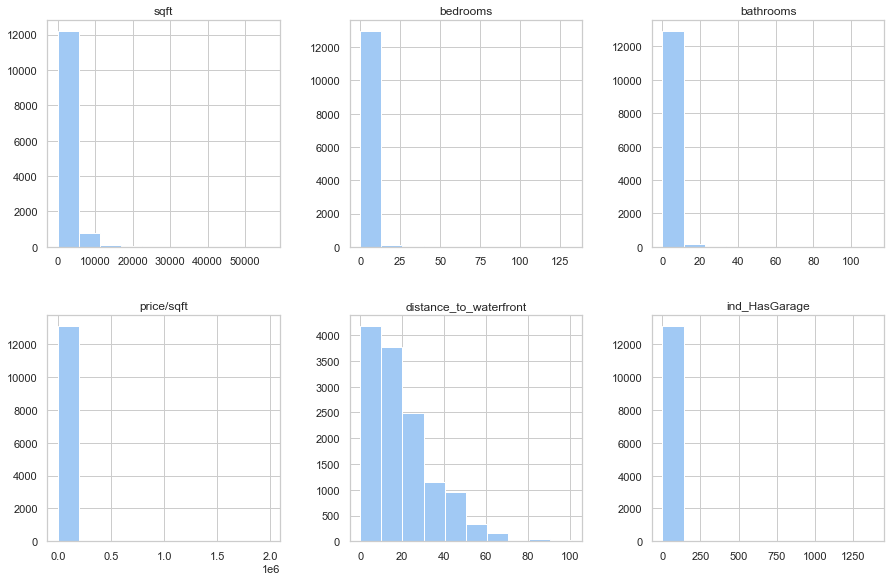

In [12]:
ax_list = df[['sqft','bedrooms','bathrooms','price/sqft','distance_to_waterfront','ind_HasGarage']].hist(bins=10, layout=(3,3), figsize=(15,15))

### Additional data cleanup and removing outliers
There are several options to filter outliers.
- Removing the bottom and top 10% of data
- Filter out properties with > 8 garages
- Filter out square footage > 10000 sqft and < 300 sqft
- Filter out number of bedrooms < 1 and > 10
- Filter out number of bathrooms < 1 and > 10
- Filter out listings not in BC and CA

In [13]:
## Removing outliers
from src.data_manipulation.data_cleanup import removeOutliers

df = removeOutliers(df, 'price/sqft') 
df = removeOutliers(df, 'bedrooms')
df = removeOutliers(df, 'bathrooms')
df = removeOutliers(df, 'sqft')
df = removeOutliers(df, 'ind_HasGarage')
df = removeOutliers(df, 'price')

# Additional Filtering
df = df[(df['ind_HasGarage'] < 8 ) & (df['sqft'] < 10000 ) & (df['sqft'] > 300) & (df['bedrooms'].between(1,10) ) & (df['bathrooms'].between(1,10) ) 
        & (df['state'] != 'WA' ) & (df['homeType'] != 'LOT') & (df['homeType'] != 'MANUFACTURED') & (df['homeStatus'] == 'FOR_SALE')]

## check what we have remaining after the initial filters
print(df.groupby('state').size())
print('\n')
## Display the number or properties in USA and CA by home type
print(pd.crosstab(df['homeType'],df['state']))

state
BC    3548
CA    8415
dtype: int64


state            BC    CA
homeType                 
CONDO           687  1262
MULTI_FAMILY    186  1063
SINGLE_FAMILY  2308  5644
TOWNHOUSE       367   446


### Checking for outliers
- Using Violin plot to visualize the distribution of data by home type
- Created split violins to compare the distributions by state (BC and CA)
- Dashed lines represent the quartiles for each group; heavy dashed lines indicate the median

Observations:
- The median price/sqft difference for multi-family homes is more pronounced than other home types
- Median price/sqft in BC and CA are about the same for other home types

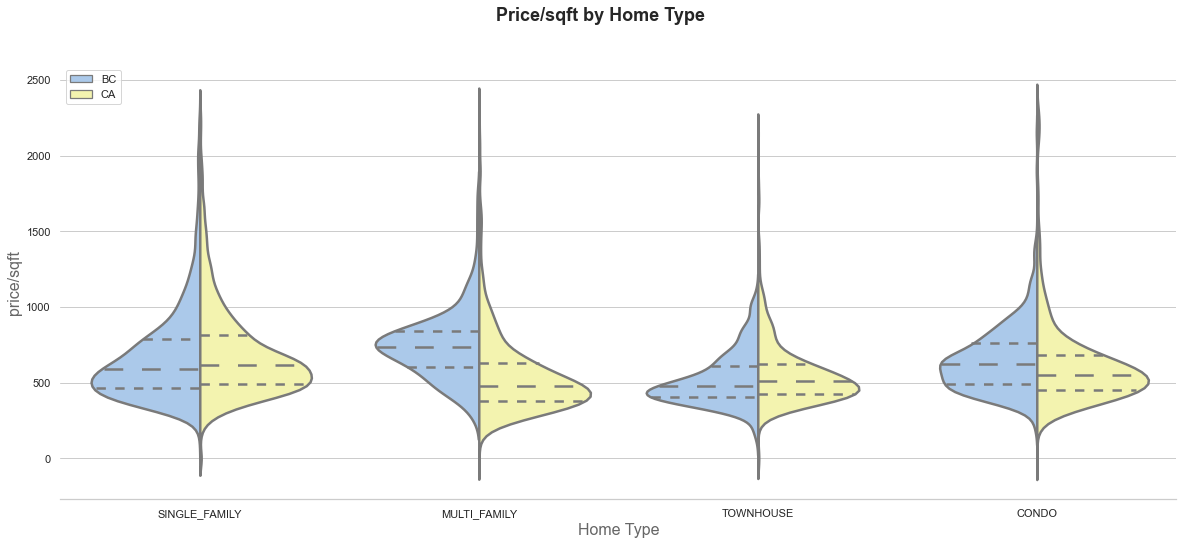

In [14]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

f, ax = plt.subplots(figsize=(20, 8))

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="homeType", y="price/sqft", hue="state", data=df, split=True, linewidth=2.5,
               inner="quart", palette={"BC": "b", "CA": "y"})
sns.despine(left=True)

f.suptitle('Price/sqft by Home Type', fontsize=18, fontweight='bold')
ax.set_xlabel("Home Type",size = 16,alpha=0.7)
ax.set_ylabel("price/sqft",size = 16,alpha=0.7)
plt.legend(loc='upper left')

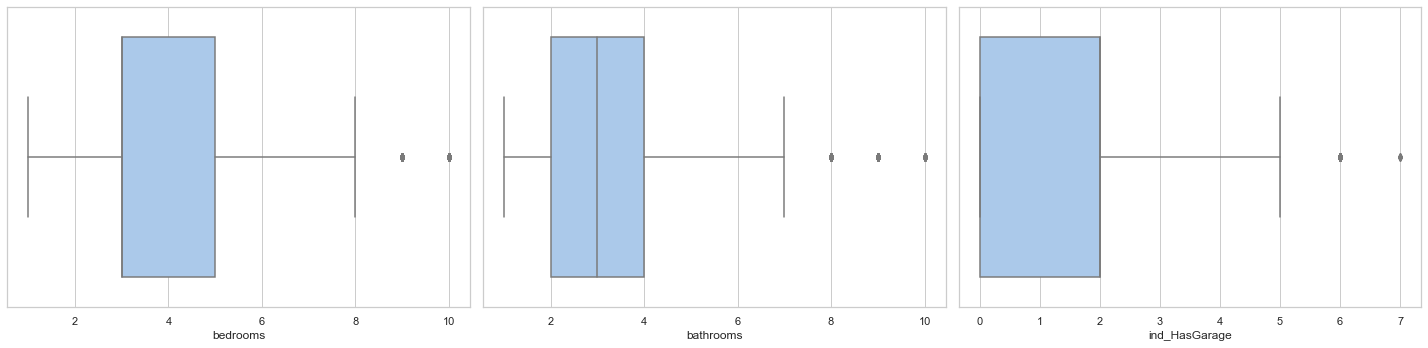

In [15]:
plt.rcParams["figure.figsize"] = [20.00, 5.0]
plt.rcParams["figure.autolayout"] = True
f1, axes1 = plt.subplots(1, 3)

sns.boxplot(x=df.bedrooms, y=None, ax=axes1[0])
sns.boxplot(x=df.bathrooms, ax=axes1[1])
sns.boxplot(x=df['ind_HasGarage'],ax=axes1[2])

plt.show()

# 4 - Visualize Data

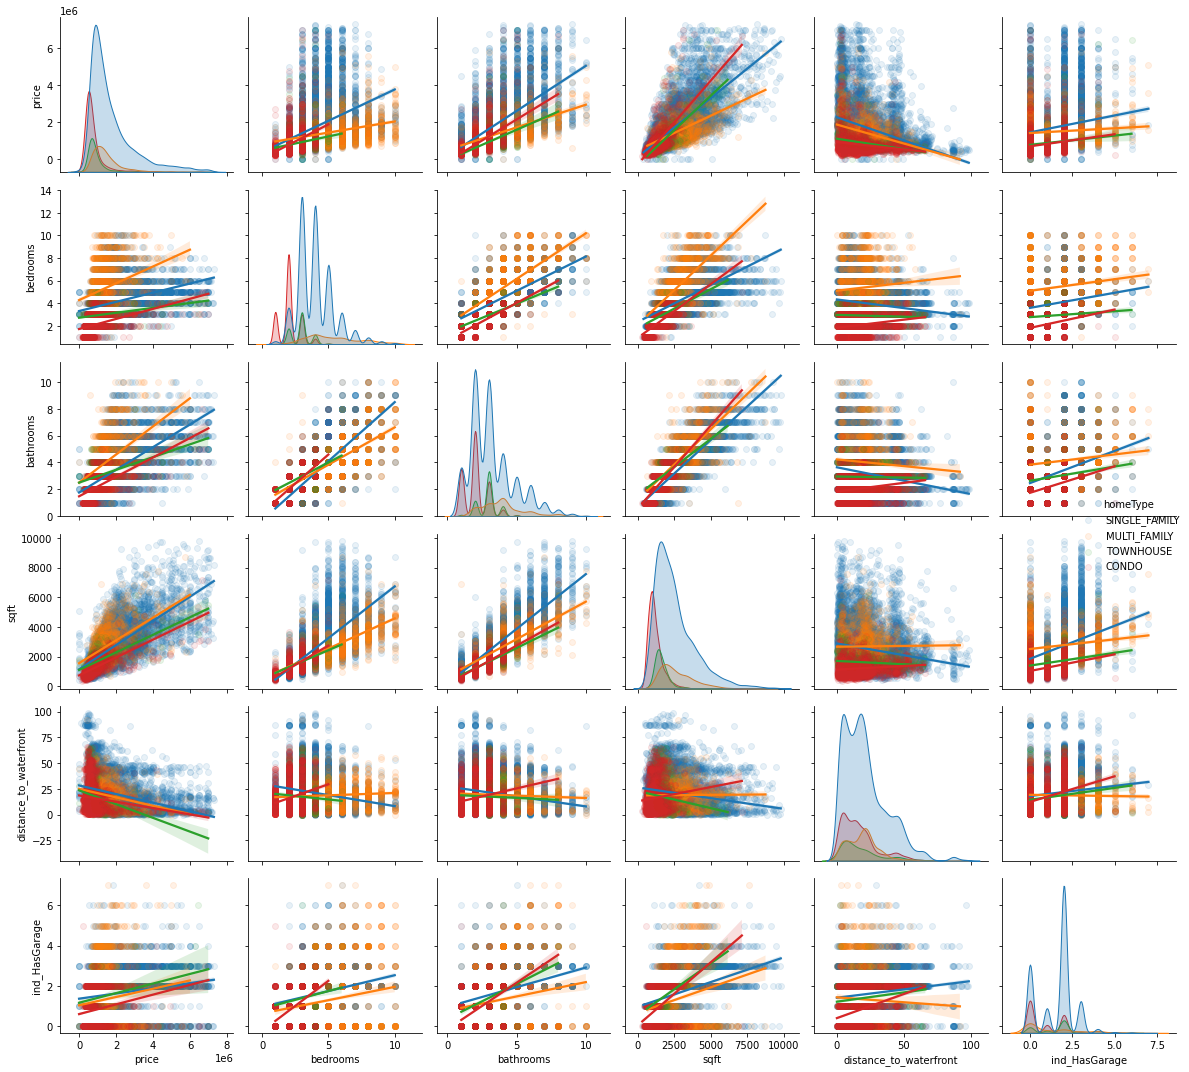

In [14]:
import seaborn as sns
sns.pairplot(df[['price','bedrooms','bathrooms','sqft','distance_to_waterfront','ind_HasGarage', 'homeType']], hue='homeType',  kind='reg', plot_kws={'scatter_kws': {'alpha': 0.1}})

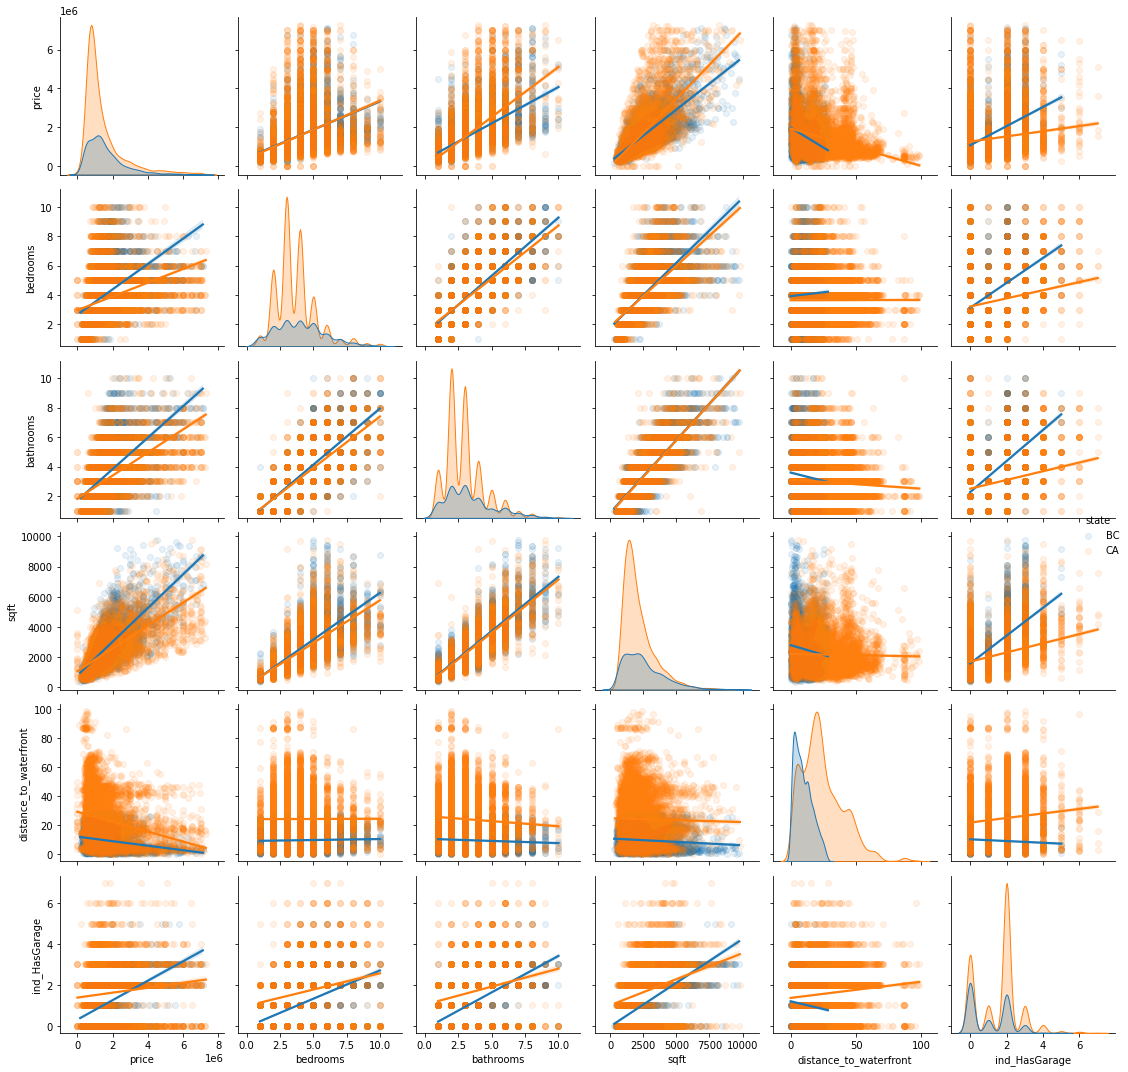

In [15]:
import seaborn as sns
sns.pairplot(df[['price','bedrooms','bathrooms','sqft','distance_to_waterfront','ind_HasGarage', 'state']], hue='state',  kind='reg', plot_kws={'scatter_kws': {'alpha': 0.1}})

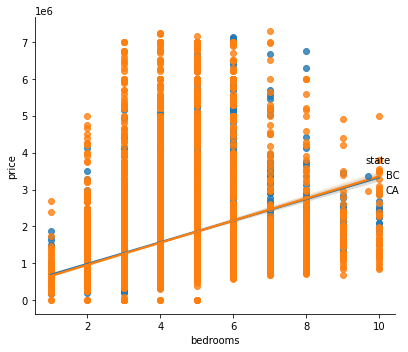

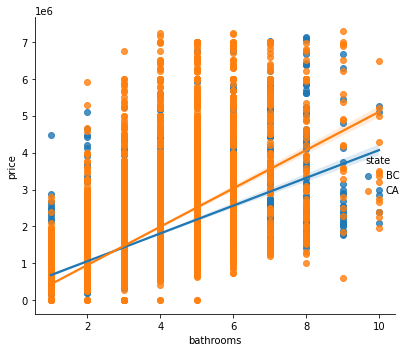

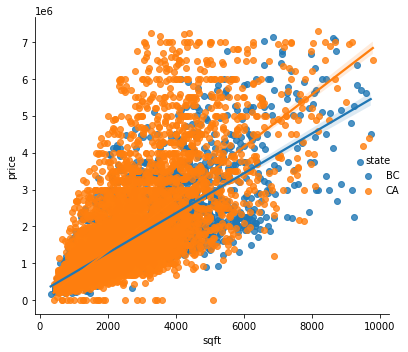

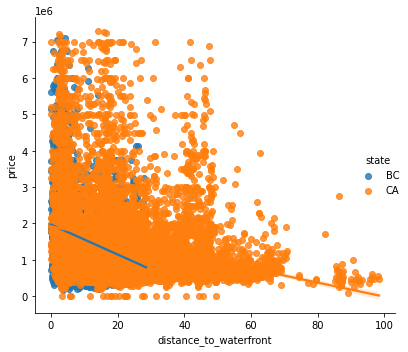

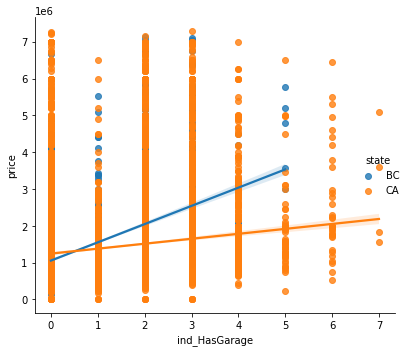

In [16]:
for column in ['bedrooms','bathrooms','sqft','distance_to_waterfront','ind_HasGarage']:
    sns.lmplot(x=column, y='price', data=df, hue='state')

### Pairplot Observations
Starting with the "pairplot" of select numerical features from our dataset, and also coloring them by the type of property, we can make the below observations:
- There are distinct trends between the different property types in certain features, for example sale listing price vs bedrooms , bathrooms or total square footage showed two very different trends between single family and multifamily homes
- Our engineered feature distance to waterfront did not yield an immediately obvious trend against price, although we do see that the properties closer to the waterfront see a drastic increase in price
- Regardless of property type (majority being single family and multi family), the number of bedrooms correlates quite well with the number of bathrooms
- In general it appears the Canadian (specifically Vancouver BC) prices show a steeper trend against all the features compared to the US (specifically Los Angeles CA)

## Comparing features vs Price per Sqft
In this section we attempt to normalize price to a price/sqft value, this is aimed to investigate a more "fair" comparison between the different property types since single family houses often tend to have higher square footage than multi family, townhouse and condos.

Additionally we also calculate a log base 10 transform of price/sqft, because this value does not appear to be normally distributed and appears to be more of a geometrical distribution.

We also take a base 10 log transform of distance to waterfront to see whether this yields a better correlation against price/sqft

In [17]:
df['price_per_sqft'] = df['price'] / df['sqft']
df['log_price_per_sqft'] = np.log10(df['price_per_sqft'])
df['log_distance_to_waterfront'] = np.log10(df['distance_to_waterfront'].apply(lambda x: x+abs(min(df['distance_to_waterfront']))))


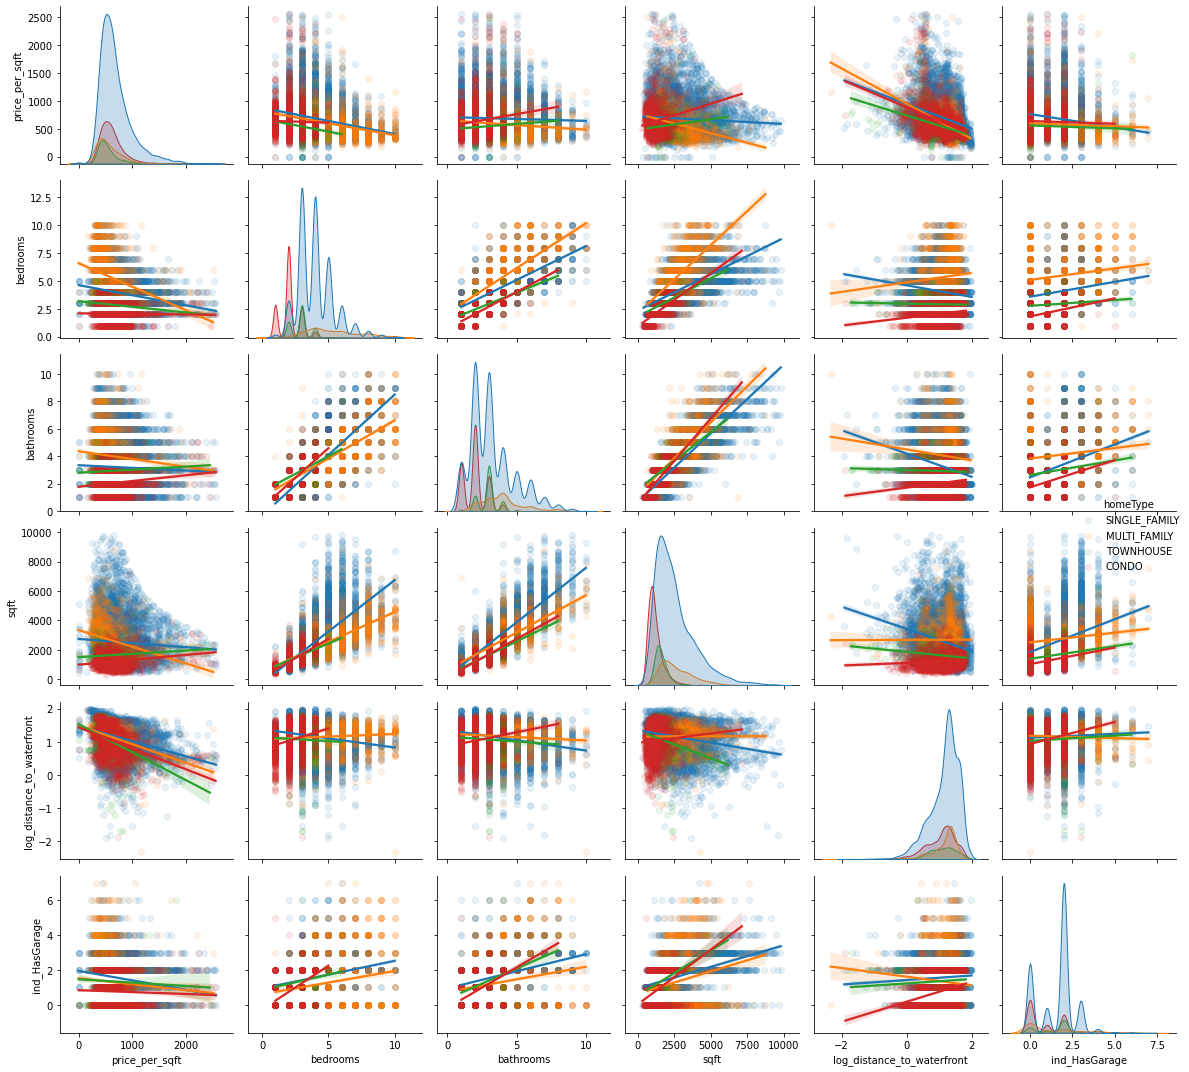

In [18]:
sns.pairplot(df[['price_per_sqft','bedrooms','bathrooms','sqft','log_distance_to_waterfront','ind_HasGarage', 'homeType']], hue='homeType',  kind='reg', plot_kws={'scatter_kws': {'alpha': 0.1}})

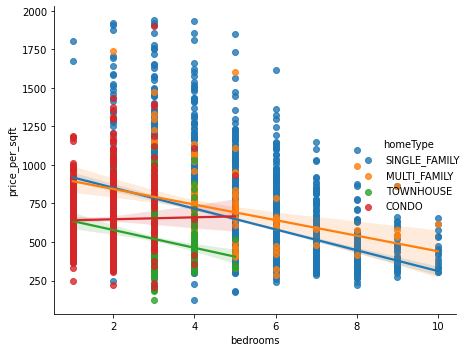

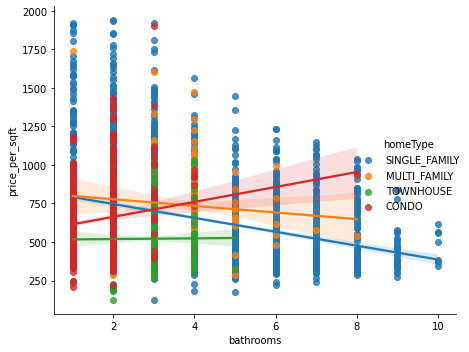

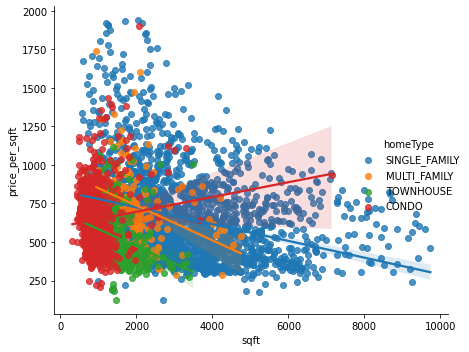

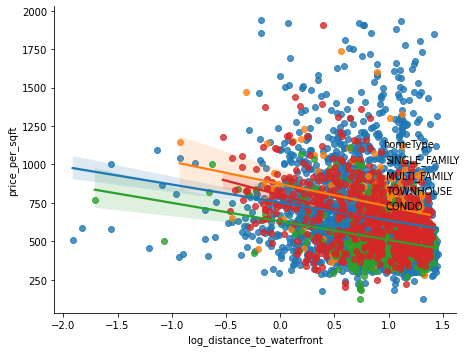

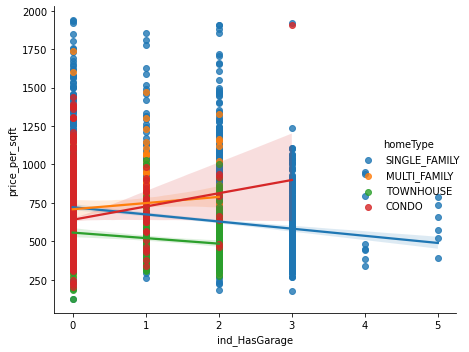

In [19]:
# Filtering the plots to just investigate trends in Vancouver, BC, Canada
for column in ['bedrooms','bathrooms','sqft','log_distance_to_waterfront','ind_HasGarage']:
    sns.lmplot(x=column, y='price_per_sqft', data=df[df['state']=='BC'], hue='homeType')

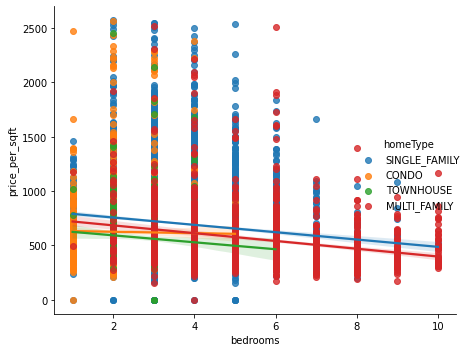

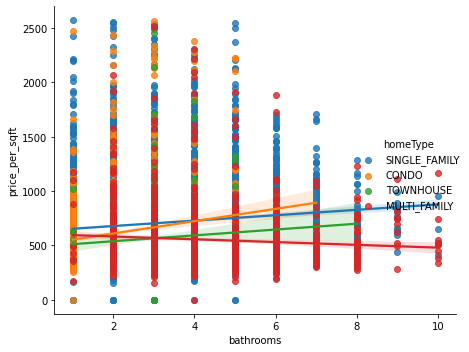

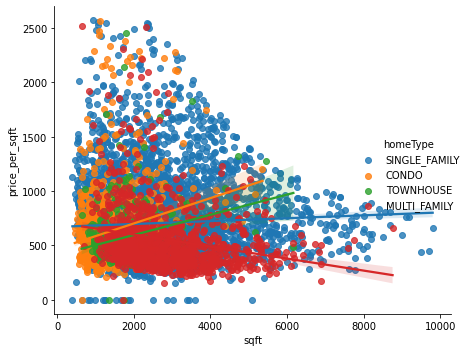

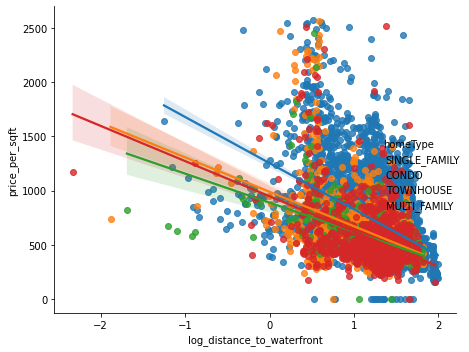

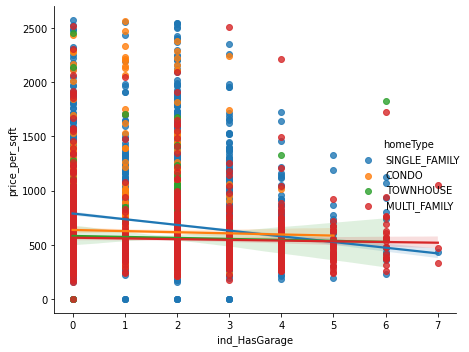

In [20]:
# Filtering the plots to just investigate trends in Los Angeles, CA, USA
for column in ['bedrooms','bathrooms','sqft','log_distance_to_waterfront','ind_HasGarage']:
    sns.lmplot(x=column, y='price_per_sqft', data=df[df['state']=='CA'], hue='homeType')

## Heat Map visualization of Price/Sqft

In [56]:
import folium
from folium.plugins import HeatMap
# create coastline dictionary 

coastline = {'BC': [
    (49.4179, -123.2336),
    (49.3322, -123.2652),
    (49.3223, -123.1416),
    (49.2758, -123.1485),
    (49.2758, -123.2639),
    (49.2194, -123.2185),
    (49.0820, -123.1842),
    (49.0327, -123.1073),
    (48.9678, -123.0826),
    (48.9714, -123.0125),
    (49.0435, -123.0414),
    (49.0866, -122.8725),
    (49.0273, -122.8807),
    (49.0021, -122.7755)
],
            'CA':[
    (34.0032, -118.8062),
    (34.0078, -118.5095),
    (33.8005, -118.3914),
    (33.7617, -118.4079),
    (33.6978, -118.2843),
    (33.7457, -118.1140),
    (33.5904, -117.9135),
    (33.2077, -117.3917)
]
}

# create initial map layers for the two cities
vancouver_heatmap = folium.Map(location=[49.2497, -123.1193], zoom_start=10)
LA_heatmap = folium.Map(location=[33.7617, -118.4079], zoom_start=9)

gradient = {0.2: 'green', 0.4: 'blue', 0.6: 'yellow', 1: 'red'}

# create a function that generates the heatmap, and plots it out
def show_heatmap(state, map_column, init_map):
    
    folium.PolyLine(coastline[state], color="red", weight=2.5, opacity=1).add_to(init_map)
    df_filter = df[df['state']==state]
    max_val = df_filter[map_column].max()
    min_val = df_filter[map_column].min()
    q20_val = df_filter[map_column].quantile(0.2)
    q80_val = df_filter[map_column].quantile(0.8)
    
    data_price_locations = df_filter[['latitude', 'longitude', map_column]].values.tolist()
    city = 'Vancouver, BC' if state == 'BC' else 'Los Angeles, CA'
    heatmap_layer = HeatMap(data_price_locations, 
                            name=f'{city} Price/Sqft', 
                            min_opacity=0.1, 
                            radius=20,
                           min_val =q20_val,
                           max_val = q80_val,

                           )
    heatmap_layer.add_to(init_map)
    folium.LayerControl().add_to(init_map)
    return init_map



In [57]:
display(show_heatmap('BC', 'price/sqft', vancouver_heatmap))
display(show_heatmap('CA', 'price/sqft', LA_heatmap))

C:\Users\JZ2018\AppData\Local\Temp\ipykernel_7300\1450535122.py:51: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  heatmap_layer = HeatMap(data_price_locations,


C:\Users\JZ2018\AppData\Local\Temp\ipykernel_7300\1450535122.py:51: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  heatmap_layer = HeatMap(data_price_locations,


In [58]:
display(show_heatmap('BC', 'price', vancouver_heatmap))
display(show_heatmap('CA', 'price', LA_heatmap))

C:\Users\JZ2018\AppData\Local\Temp\ipykernel_7300\1450535122.py:51: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  heatmap_layer = HeatMap(data_price_locations,


C:\Users\JZ2018\AppData\Local\Temp\ipykernel_7300\1450535122.py:51: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  heatmap_layer = HeatMap(data_price_locations,


### Heat Map Observations
While it is interesting that the higher value (both price and price/sqft) listings generally tend to not be very far from the waterfront, it can be seen that the trend is much more apparent in Vancouver, BC compared to Los Angeles, CA. 

In Vancouver almost all properties in communities that have are along the coastline appear to be higher priced. However in Los Angeles we only see a couple of communities along the coastline that are very high priced with the other areas along the coastline generally in the same price range as the rest of the city.

In [64]:
#pd.set_option('display.max_columns', None)
df[df['state'].isin(['BC','CA'])].groupby('state')[['price','price/sqft','sqft']].agg(['mean', 'median', 'min', 'max'])

price                                   price/sqft              \
               mean     median       min         max        mean      median   
state                                                                          
BC     2.326451e+06  1788940.0  169900.0  26888000.0  911.365716  800.145243   
CA     1.859546e+06  1000000.0     100.0  45000000.0  722.463374  588.235294   

                                        sqft                         
              min           max         mean  median    min     max  
state                                                                
BC     166.666667  11923.076923  2609.097328  2220.0  317.0  9949.0  
CA       0.030547   9759.638848  2316.582039  1835.0  330.0  9991.0

This table shows summary statistics for the price, price/sqft and sqft data in each State (each city), with BC as Vancouver and CA as Los Angeles.

Here we see that the higher prices in Vancouver is often driven by larger square footages (almost 20% higher on median comparisons). When accounting for the currency exchange of 1 USD ~ 1.33 CAD, the prices in Vancouver appear to still be higher than Los Angeles.

### Which features impact real estate prices?
- Buyers tend to look for properties with access to activities that apply to their interest.
- Access to facilities were added as new columns to the data
- Determine if there is a difference in home prices based on the availability of certain features. 
- We focused on the following features: access to a golf course, shopping, recreational facility or park, and lot location (i.e. corner lot)

In [16]:
features = ['ind_GolfCourseNearby','ind_ShoppingNearby','ind_Clubhouse','ind_RecreationNearby','ind_ParkNearby','ind_IsCornerLot','ind_IsCuldesac']
labels = ['Golf Course','Shopping Stores','Clubhouse','Recreation','Park','Corner Lot','Cul-de-sac']
df2 = pd.DataFrame(columns = ['Feature','Yes','No'])
i=0
for item in features:
    df2.loc[i] = [labels[i],df.loc[df[item]==True,'price/sqft'].mean(),df.loc[df[item]==False,'price/sqft'].mean()]
    i+=1
df2['Diff%'] = (df2.Yes-df2.No)/df2.No*100
df2[['Yes','No','Diff%']] = df2[['Yes','No','Diff%']].round(decimals=0)
df2


Feature    Yes     No  Diff%
0      Golf Course  639.0  658.0   -3.0
1  Shopping Stores  646.0  660.0   -2.0
2        Clubhouse  572.0  658.0  -13.0
3       Recreation  643.0  660.0   -3.0
4             Park  665.0  657.0    1.0
5       Corner Lot  657.0  657.0   -0.0
6       Cul-de-sac  607.0  662.0   -8.0

[Text(0.5, 1.0, 'Average price/sqft by Feature')]

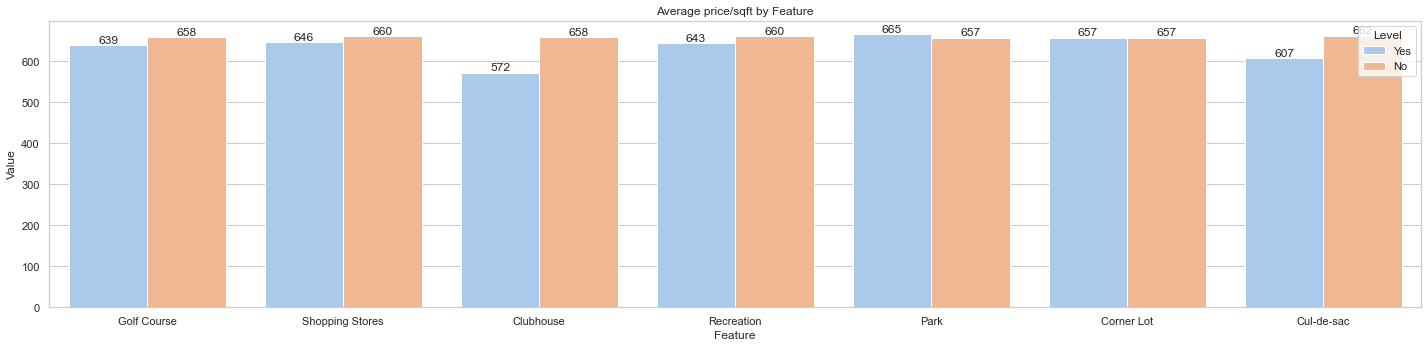

In [17]:
## Displaying same data in a chart

df3 = df2[['Feature','Yes','No']]
df3.set_index('Feature', inplace=True)
df3 = df3.stack().to_frame('Value').reset_index()
df3.rename(columns={'level_1':'Level'},inplace=True)

ax = sns.barplot(x='Feature', y='Value',hue = 'Level',data=df3,errwidth=0)
for i in ax.containers: ax.bar_label(i,)      
ax.set(title="Average price/sqft by Feature")

### Observations:
- Access to a golf course, shopping stores and recreational facilities does not have significant impact to home prices.
- Surpringly, cul-de-sac listings appear to be less expensive compared to interior lots; this could be caused by small number of listings collected with that feature.

# Conclusion

TODO: Add conclusion section here